In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

In [5]:
rng = np.random.default_rng(7)

muA = np.zeros(5)
SigmaA = np.array([[1.0, 0.8, 0.1, 0.0, 0.0],
                    [0.8, 1.0, 0.3, 0.0, 0.0],
                    [0.1, 0.3, 1.0, 0.5, 0.0],
                    [0.0, 0.0, 0.5, 1.0, 0.2],
                    [0.0, 0.0, 0.0, 0.2, 1.0]])

muB = np.full(5, 1.5)
SigmaB = np.array([[1.5, -0.7, 0.2, 0.0, 0.0],
                    [-0.7, 1.5, 0.4, 0.0, 0.0],
                    [0.2, 0.4, 1.5, 0.6, 0.0],
                    [0.0, 0.0, 0.6, 1.5, 0.3],
                    [0.0, 0.0, 0.0, 0.3, 1.5]])

nA = nB = 500
XA = rng.multivariate_normal(muA, SigmaA, size=nA)
XB = rng.multivariate_normal(muB, SigmaB, size=nB)
X = np.vstack([XA, XB])
y = np.array([0]*nA + [1]*nB)

In [6]:
pca = PCA(n_components=2, random_state=7)
Z = pca.fit_transform(X)

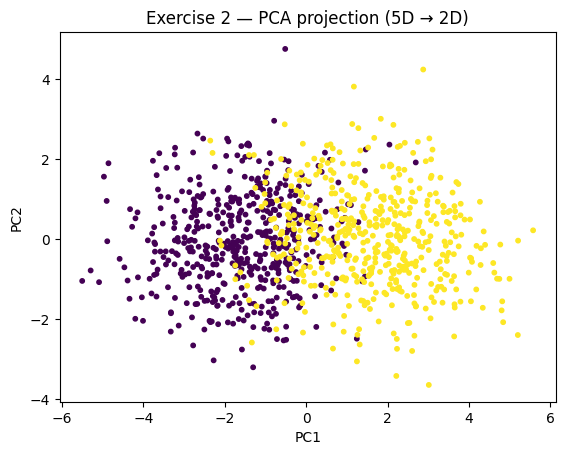

In [7]:
plt.figure()
plt.scatter(Z[:,0], Z[:,1], c=y, s=10)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("Exercise 2 — PCA projection (5D → 2D)")
plt.savefig(os.path.join("images", "ex2_pca_scatter.png"), dpi=160, bbox_inches="tight")
plt.show()

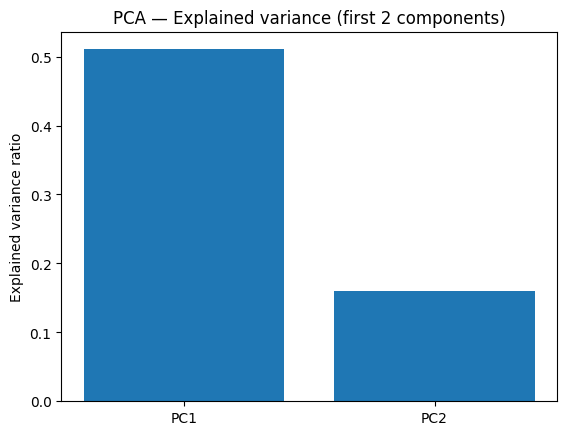

In [8]:
plt.figure()
evr = pca.explained_variance_ratio_
plt.bar([1,2], evr)
plt.xticks([1,2], ["PC1", "PC2"])
plt.ylabel("Explained variance ratio")
plt.title("PCA — Explained variance (first 2 components)")
plt.savefig(os.path.join("images", "ex2_pca_evr.png"), dpi=160, bbox_inches="tight")
plt.show()